# Map of best MSU locations

With population density.

## Code setup

In [124]:
import matplotlib.pyplot as plt
import stroke_maps.load_data
import os
import pandas as pd
import geopandas as gpd

import cmasher as cmr

## Load data

Population density:

In [7]:
path_to_demog = os.path.join('..', 'data', 'LSOA_popdens.csv')

df_demog = pd.read_csv(path_to_demog)

df_demog.head()

,LSOA,population_density
0,Adur 001A,1393.0439
1,Adur 001B,1497.5704
2,Adur 001C,125.6592
3,Adur 001D,2168.2416
4,Adur 001E,2686.5747


Best MSU locations:

In [79]:
path_to_best_locs = os.path.join('..', 'data', 'sites_for_map.csv')

df_msu_best_locs = pd.read_csv(path_to_best_locs)

df_msu_best_locs.head()

,ambulance_service,configuration,time_mins,best_config
0,EEAST,Luton and Dunstable Hospital,30,1
1,EEAST,Luton and Dunstable Hospital,45,0
2,EEAST,Southend Hospital,45,0
3,EEAST,Basildon University Hospital,30,0
4,EEAST,Queen Elizabeth Hospital Kings Lynn,60,0


Stroke unit name-postcode lookup:

In [9]:
df_units = stroke_maps.load_data.stroke_unit_region_lookup()

df_units.head(3).T

postcode,SY231ER,CB20QQ,L97AL
stroke_team,Bronglais Hospital (Aberystwyth),"Addenbrooke's Hospital, Cambridge","University Hospital Aintree, Liverpool"
short_code,AB,AD,AI
ssnap_name,Bronglais Hospital,Addenbrooke's Hospital,University Hospital Aintree
use_ivt,1,1,1
use_mt,0,1,1
use_msu,0,1,1
transfer_unit_postcode,nearest,nearest,nearest
lsoa,Ceredigion 002A,Cambridge 013D,Liverpool 005A
lsoa_code,W01000512,E01017995,E01006654
region,Hywel Dda University Health Board,NHS Cambridgeshire and Peterborough ICB - 06H,NHS Cheshire and Merseyside ICB - 99A


### Geography

LSOA shapes:

In [58]:
gdf_lsoa = stroke_maps.load_data.lsoa_geography()

# Convert to British National Grid:
gdf_lsoa = gdf_lsoa.to_crs('EPSG:27700')

gdf_lsoa.head(3).T

,0,1,2
OBJECTID,1,2,3
LSOA11CD,E01000001,E01000002,E01000003
LSOA11NM,City of London 001A,City of London 001B,City of London 001C
LSOA11NMW,City of London 001A,City of London 001B,City of London 001C
BNG_E,532129,532480,532245
BNG_N,181625,181699,182036
LONG,-0.09706,-0.09197,-0.09523
LAT,51.5181,51.51868,51.52176
Shape__Area,157794.481079,164882.427628,42219.805717
Shape__Length,1685.391778,1804.828196,909.223277


Remove Wales:

In [60]:
mask_england = gdf_lsoa['LSOA11CD'].str.startswith('E')

gdf_lsoa = gdf_lsoa[mask_england].copy()

Ambulance service regions:

In [11]:
gdf_ambo22 = stroke_maps.load_data.ambulance22_geography()

gdf_ambo22.head(3)

,ambo22,geometry
0,EEAST,"MULTIPOLYGON (((504078.594 192959.141, 504011...."
1,EMAS,"MULTIPOLYGON (((427187.406 311340.906, 427226...."
2,IWAS,"MULTIPOLYGON (((450897.496 75508.595, 450613.3..."


Remove Wales ambulance service:

In [51]:
mask_england = gdf_ambo22['ambo22'] != 'WAST'

gdf_ambo22 = gdf_ambo22[mask_england].copy()

Stroke unit locations:

In [85]:
gdf_unit_coords = stroke_maps.load_data.stroke_unit_coordinates()

gdf_unit_coords.head(3)

,BNG_E,BNG_N,Latitude,Longitude,geometry
postcode,,,,,
RM70AG,551110,187777,51.568622,0.178914,POINT (551110.000 187777.000)
E11BB,534833,181799,51.519026,-0.058075,POINT (534833.000 181799.000)
SW66SX,524227,176487,51.473716,-0.212722,POINT (524227.000 176487.000)


Major roads:

In [125]:
path_to_roads = os.path.join('..', 'data', 'major_roads_with_short_names.geojson')

gdf_roads = gpd.read_file(path_to_roads)
gdf_roads = gdf_roads.set_index('roadNumber')

gdf_roads.head()

,function,geometry
roadNumber,,
A1,A Road,MULTILINESTRING Z ((325846.710 674006.480 0.00...
A1(M),Motorway,MULTILINESTRING Z ((421602.190 505924.220 0.00...
A10,A Road,MULTILINESTRING Z ((532556.150 192610.270 0.00...
A11,A Road,MULTILINESTRING Z ((533740.060 181263.950 0.00...
A12,A Road,MULTILINESTRING Z ((537073.980 185270.050 0.00...


Keep only England:

In [129]:
gdf_roads = gpd.clip(gdf_roads, gdf_lsoa['geometry'])

## Set up background map data

Merge the population density info into the LSOA shapes.

In [59]:
gdf_lsoa = pd.merge(
    gdf_lsoa, df_demog,
    left_on='LSOA11NM', right_on='LSOA', how='left'
    )

In [61]:
gdf_lsoa.head(3)

,OBJECTID,LSOA11CD,LSOA11NM,LSOA11NMW,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,GlobalID,geometry,LSOA,population_density
0,1,E01000001,City of London 001A,City of London 001A,532129,181625,-0.09706,51.51810,157794.481079,1685.391778,b12173a3-5423-4672-a5eb-f152d2345f96,"POLYGON ((532282.642 181906.500, 532248.262 18...",City of London 001A,5085.6719
1,2,E01000002,City of London 001B,City of London 001B,532480,181699,-0.09197,51.51868,164882.427628,1804.828196,90274dc4-f785-4afb-95cd-7cc1fc9a2cad,"POLYGON ((532746.826 181786.896, 532248.262 18...",City of London 001B,2875.8785
2,3,E01000003,City of London 001C,City of London 001C,532245,182036,-0.09523,51.52176,42219.805717,909.223277,7e89d0ba-f186-45fb-961c-8f5ffcd03808,"POLYGON ((532293.080 182068.426, 532419.605 18...",City of London 001C,12851.7717


## Set up best location data

Link best unit names with postcodes.

Find the postcode that matches each unit name:

In [80]:
dict_unit_lookup = {}

for unit in df_msu_best_locs['configuration']:
    # Remove any leading or trailing whitespace:
    unit_str = unit.lstrip(' ').rstrip(' ')
    if unit_str in df_units['stroke_team'].values:
        dict_unit_lookup[unit] = df_units[df_units['stroke_team'] == unit_str].index.values[0]
    elif unit_str in df_units['ssnap_name'].values:
        dict_unit_lookup[unit] = df_units[df_units['ssnap_name'] == unit_str].index.values[0]
    else:
        # This shouldn't happen!
        dict_unit_lookup[unit] = '??'

Merge these postcodes into the starting data:

In [81]:
df_msu_best_locs['postcode'] = df_msu_best_locs['configuration'].map(dict_unit_lookup)

In [82]:
df_msu_best_locs

,ambulance_service,configuration,time_mins,best_config,postcode
0,EEAST,Luton and Dunstable Hospital,30,1,LU40DZ
1,EEAST,Luton and Dunstable Hospital,45,0,LU40DZ
2,EEAST,Southend Hospital,45,0,SS00RY
3,EEAST,Basildon University Hospital,30,0,SS165NL
4,EEAST,Queen Elizabeth Hospital Kings Lynn,60,0,PE304ET
5,EMAS,Leicester Royal Infirmary,30,1,LE15WW
6,EMAS,Kings Mill Hospital,30,0,NG174JL
7,LAS,Princess Royal University Hospital HASU,30,1,BR68ND
8,LAS,University College Hospital HASU,30,0,NW12BU
9,LAS,Royal London Hospital HASU,30,0,E11BB


Link best unit data with coordinates:

In [86]:
gdf_unit_coords = pd.merge(gdf_unit_coords, df_msu_best_locs.set_index('postcode'), left_index=True, right_index=True, how='left')

gdf_unit_coords.head(3)

,BNG_E,BNG_N,Latitude,Longitude,geometry,ambulance_service,configuration,time_mins,best_config
postcode,,,,,,,,,
RM70AG,551110,187777,51.568622,0.178914,POINT (551110.000 187777.000),LAS,Queens Hospital Romford HASU,30.0,0.0
E11BB,534833,181799,51.519026,-0.058075,POINT (534833.000 181799.000),LAS,Royal London Hospital HASU,30.0,0.0
SW66SX,524227,176487,51.473716,-0.212722,POINT (524227.000 176487.000),NaN,NaN,NaN,NaN


## Plot maps

In [166]:
# from matplotlib.patches import Circle, Rectangle
from matplotlib.patches import Patch
import matplotlib.lines as mlines

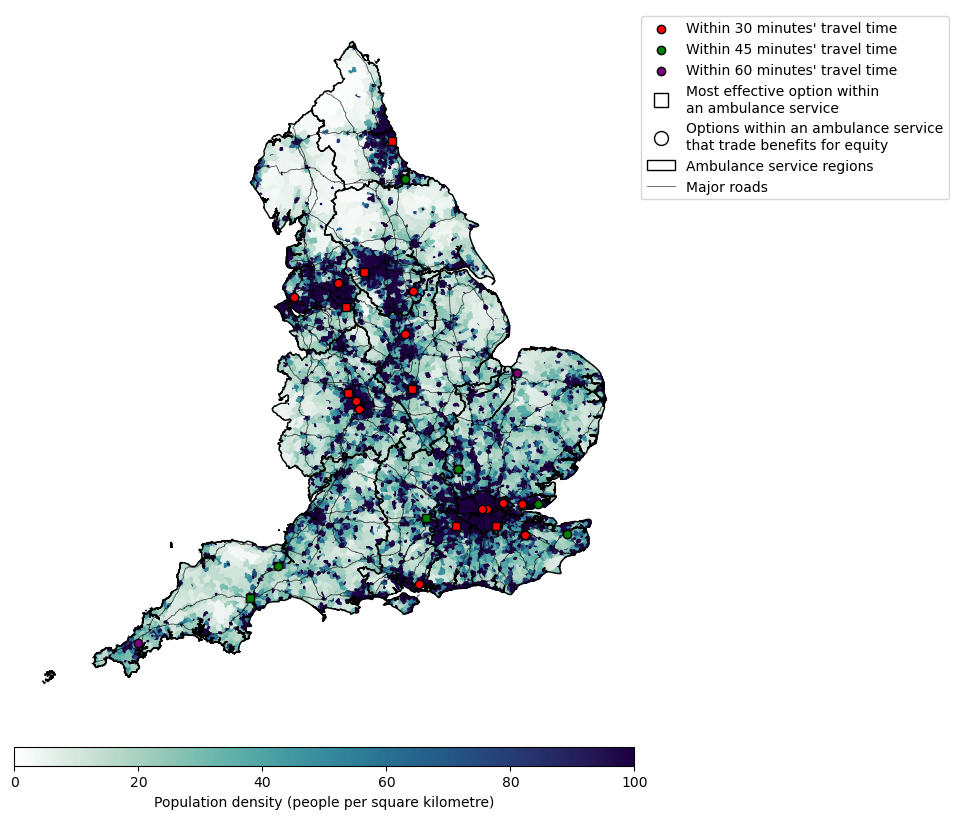

In [233]:
# Set up fig:
fig, axs = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [40, 1], 'hspace': 0.05, })
ax = axs[0]
ax_cbar = axs[1]

# Draw background population density:
gdf_lsoa.plot(
    ax=ax,
    column='population_density',
    cmap='cmr.ocean_r',  # 'cmr.neutral_r',  # 'cmr.arctic_r'
    vmin=0, vmax=100,
    edgecolor='face',
    legend=True,
    legend_kwds={
        'shrink': 0.5,
        'label': 'Population density (people per square kilometre)',
        'cax': ax_cbar,
        'orientation': 'horizontal',
    },
)

# Draw major roads:
colour_roads_ambo = 'k'
roads_kwargs = dict(color=colour_roads_ambo, linewidth=0.5, alpha=0.8, label='Major roads')
gdf_roads.plot(ax=ax, **roads_kwargs)
patch_roads = mlines.Line2D([], [], **roads_kwargs)

# Draw ambulance service regions:
ambo_kwargs = dict(facecolor='None', edgecolor=colour_roads_ambo, linewidth=1, label='Ambulance service regions')
gdf_ambo22.plot(ax=ax, **ambo_kwargs)
patch_ambo = Patch(**ambo_kwargs)

# Stroke unit setup:
unit_time_masks = {}
times = [30, 45, 60]
for t in times:
    unit_time_masks[t] = gdf_unit_coords['time_mins'] == t

unit_marker_kwargs = {}
unit_marker_kwargs[30] = dict(facecolor='r', edgecolor='k', label="Within 30 minutes' travel time", marker='o', zorder=6)#, markersize=60, linewidth=1)
unit_marker_kwargs[45] = dict(facecolor='g', edgecolor='k', label="Within 45 minutes' travel time", marker='o', zorder=5)#, markersize=60, linewidth=1)
unit_marker_kwargs[60] = dict(facecolor='purple', edgecolor='k', label="Within 60 minutes' travel time", marker='o', zorder=4)#, markersize=60, linewidth=1)

# Draw stroke units:
handles_for_legend = []
for t in times:
    mask_best = unit_time_masks[t] & (gdf_unit_coords['best_config'] == 1)
    mask_not_best = unit_time_masks[t] & (gdf_unit_coords['best_config'] != 1)

    unit_marker_kwargs_best = unit_marker_kwargs[t] | dict(label=None, marker='s', edgecolor='k', zorder=3)  # marker='s', label=None) markersize=80, 
    
    # h = gdf_unit_coords[mask_not_best].plot(ax=ax, **unit_marker_kwargs[t])
    h = ax.scatter(
        gdf_unit_coords.loc[mask_not_best, 'BNG_E'],
        gdf_unit_coords.loc[mask_not_best, 'BNG_N'],
        **unit_marker_kwargs[t]
    )
    handles_for_legend.append(h)
    # h = gdf_unit_coords[mask_best].plot(ax=ax, **unit_marker_kwargs_best)
    h = ax.scatter(
        gdf_unit_coords.loc[mask_best, 'BNG_E'],
        gdf_unit_coords.loc[mask_best, 'BNG_N'],
        **unit_marker_kwargs_best
    )
    # handles_for_legend.append(h)

# # Draw legend:

patch_best = mlines.Line2D(
    [], [],
    color='w', markeredgecolor='k', marker='s', linestyle='None',
    markersize=10,
    label='Most effective option within\nan ambulance service'
)

patch_not_best = mlines.Line2D(
    [], [],
    color='w', markeredgecolor='k', marker='o', linestyle='None',
    markersize=10,
    label='Options within an ambulance service\nthat trade benefits for equity'
)

handles_for_legend += [patch_best, patch_not_best, patch_ambo, patch_roads]

ax.legend(handles=handles_for_legend, loc='upper left', bbox_to_anchor=[1.0, 1.0])

# # TO DO - final marker sizes/colours


# Remove frame and coordinate labels:
ax.axis('off')

plt.savefig('map_msu_best_locations.png', bbox_inches='tight')
plt.show()

## Gaps between regions

In [201]:
gdf_ambo22

,ambo22,geometry
0,EEAST,"MULTIPOLYGON (((504078.594 192959.141, 504011...."
1,EMAS,"MULTIPOLYGON (((427187.406 311340.906, 427226...."
2,IWAS,"MULTIPOLYGON (((450897.496 75508.595, 450613.3..."
3,LAS,"MULTIPOLYGON (((510797.375 170600.422, 510753...."
4,NEAS,"MULTIPOLYGON (((417925.732 515867.666, 417905...."
5,NWAS,"MULTIPOLYGON (((326050.501 378570.905, 326038...."
6,SCAS,"MULTIPOLYGON (((431521.123 90539.379, 431498.2..."
7,SECAmb,"MULTIPOLYGON (((483647.937 93878.803, 483365.4..."
8,SWAS,"MULTIPOLYGON (((83892.297 5351.297, 83908.103 ..."
10,WMAS,"POLYGON ((351409.002 215922.733, 351372.051 21..."


In [202]:
gdf_lsoa

,OBJECTID,LSOA11CD,LSOA11NM,LSOA11NMW,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,GlobalID,geometry,LSOA,population_density
0,1,E01000001,City of London 001A,City of London 001A,532129,181625,-0.097060,51.51810,157794.481079,1685.391778,b12173a3-5423-4672-a5eb-f152d2345f96,"POLYGON ((532282.642 181906.500, 532248.262 18...",City of London 001A,5085.6719
1,2,E01000002,City of London 001B,City of London 001B,532480,181699,-0.091970,51.51868,164882.427628,1804.828196,90274dc4-f785-4afb-95cd-7cc1fc9a2cad,"POLYGON ((532746.826 181786.896, 532248.262 18...",City of London 001B,2875.8785
2,3,E01000003,City of London 001C,City of London 001C,532245,182036,-0.095230,51.52176,42219.805717,909.223277,7e89d0ba-f186-45fb-961c-8f5ffcd03808,"POLYGON ((532293.080 182068.426, 532419.605 18...",City of London 001C,12851.7717
3,4,E01000005,City of London 001E,City of London 001E,533581,181265,-0.076280,51.51452,212682.404259,2028.654904,a14c307a-874c-4862-828a-3b1486cc21ea,"POLYGON ((533604.258 181418.133, 533743.702 18...",City of London 001E,4433.6702
4,5,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,544994,184276,0.089318,51.53876,130551.387161,1716.896118,65121a2d-3d2b-4935-9712-690f2993cfd2,"POLYGON ((545271.931 184183.952, 545296.326 18...",Barking and Dagenham 016A,5686.9299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32839,32840,E01033764,Liverpool 022E,Liverpool 022E,334835,391776,-2.981970,53.41875,860042.918648,5391.751929,154ef446-0589-4c60-acfb-20569d980c33,"POLYGON ((335192.822 393305.923, 335247.442 39...",Liverpool 022E,1297.0482
32840,32841,E01033765,Liverpool 061D,Liverpool 061D,334922,388603,-2.980010,53.39025,345807.756149,2276.298891,11700f36-df8a-4890-b244-3c17211d2a21,"POLYGON ((335275.871 388752.943, 335329.925 38...",Liverpool 061D,1497.0188
32841,32842,E01033766,Liverpool 042G,Liverpool 042G,338828,388254,-2.921210,53.38758,62196.555656,1086.506372,1a24205f-f2c4-4735-b42f-6a326ce9eb61,"POLYGON ((338655.592 388147.878, 338763.839 38...",Liverpool 042G,5866.3101
32842,32843,E01033767,Liverpool 050J,Liverpool 050J,335569,387577,-2.970070,53.38111,82716.135147,1129.995969,0af4c423-c1e4-4bcb-8f7f-9f46230e3396,"POLYGON ((335812.307 387655.820, 335769.013 38...",Liverpool 050J,4785.1281


In [215]:
gdf_units_here['geometry'].x

postcode
S102JF     458794.0
S752EP     458247.0
WF14DG     458875.0
HX30PW     434519.0
LS13EX     454621.0
BD96RJ     438606.0
HG27SX     456709.0
S602UD     468795.0
DN25LT     484141.0
HU32JZ     533369.0
YO318HE    485208.0
dtype: float64

/tmp/ipykernel_22410/93403235.py:64: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf_roads_here.plot(ax=ax, **roads_kwargs)


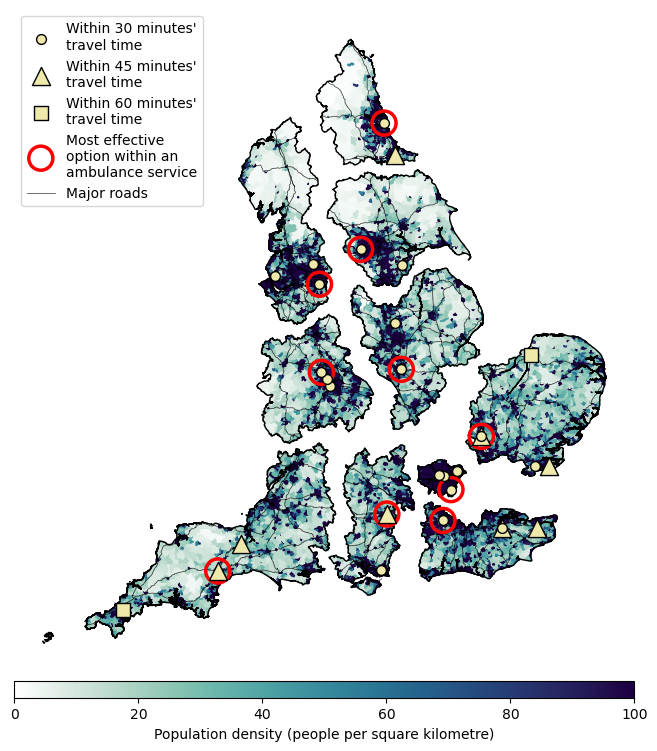

In [235]:
# Set up fig:
fig, axs = plt.subplots(2, 1, figsize=(8, 9), gridspec_kw={'height_ratios': [40, 1], 'hspace': 0.01, })
ax = axs[0]
ax_cbar = axs[1]

u = 25000
ambo_dict = {
    'EEAST': {'x_off': 3*u, 'y_off': u*0.25},
    'EMAS': {'x_off': u, 'y_off': u*0.25},
    # 'IWAS': {'x_off': -u*0.25, 'y_off': -u*1.5},
    'LAS': {'x_off': 0, 'y_off': 0},
    'NEAS': {'x_off': u, 'y_off': u*2},
    'NWAS': {'x_off': -u*0.25, 'y_off': u},
    'SCAS': {'x_off': -u*0.25, 'y_off': -u*1.5},
    'SECAmb': {'x_off': u*1.25, 'y_off': -u*1.5},
    'SWAS': {'x_off': -u*1.25, 'y_off': -u},
    'WMAS': {'x_off': -u*0.25, 'y_off': u*0.25},
    'YAS': {'x_off': u, 'y_off': u*1.25},
}
# Keep the Isle of Wight with South Central:
ambo_dict['IWAS'] = ambo_dict['SCAS']

for a, ambo_service in enumerate(ambo_dict.keys()):
    # Limit gdfs to only this region:
    gdf_ambo_here = gdf_ambo22.loc[gdf_ambo22['ambo22'] == ambo_service].copy()
    gdf_lsoa_here = gpd.clip(gdf_lsoa, gdf_ambo_here['geometry']).copy()
    gdf_roads_here = gpd.clip(gdf_roads, gdf_ambo_here['geometry']).copy()
    gdf_units_here = gpd.clip(gdf_unit_coords, gdf_ambo_here['geometry']).copy()

    
    # Add offsets:
    xoff = ambo_dict[ambo_service]['x_off']
    yoff = ambo_dict[ambo_service]['y_off']
    gdf_ambo_here['geometry'] = gdf_ambo_here['geometry'].translate(xoff=xoff, yoff=yoff,)
    gdf_lsoa_here['geometry'] = gdf_lsoa_here['geometry'].translate(xoff=xoff, yoff=yoff,)
    gdf_roads_here['geometry'] = gdf_roads_here['geometry'].translate(xoff=xoff, yoff=yoff,)
    gdf_units_here['geometry'] = gdf_units_here['geometry'].translate(xoff=xoff, yoff=yoff,)
    # Copy new coordinates:
    gdf_units_here['x'] = gdf_units_here['geometry'].x
    gdf_units_here['y'] = gdf_units_here['geometry'].y
    
    # display(gdf_ambo_here)
    # display(gdf_lsoa_here)
    
    # Draw background population density:
    gdf_lsoa_here.plot(
        ax=ax,
        column='population_density',
        cmap='cmr.ocean_r',  # 'cmr.neutral_r',  # 'cmr.arctic_r'
        vmin=0, vmax=100,
        edgecolor='face',
        legend=True,
        legend_kwds={
            'shrink': 0.5,
            'label': 'Population density (people per square kilometre)',
            'cax': ax_cbar,
            'orientation': 'horizontal',
        },
    )
    
    # Draw major roads:
    colour_roads_ambo = 'k'
    roads_kwargs = dict(color=colour_roads_ambo, linewidth=0.5, alpha=0.8, label='Major roads')
    gdf_roads_here.plot(ax=ax, **roads_kwargs)
    patch_roads = mlines.Line2D([], [], **roads_kwargs)
    
    # Draw ambulance service regions:
    ambo_kwargs = dict(facecolor='None', edgecolor=colour_roads_ambo, linewidth=1, label='Ambulance service regions')
    gdf_ambo_here.plot(ax=ax, **ambo_kwargs)
    ambo_patch_kwargs = {}
    for key, value in ambo_kwargs.items():
        if key == 'edgecolor':
            ambo_patch_kwargs['color'] = value
        elif key == 'facecolor':
            pass
        else:
            ambo_patch_kwargs[key] = value
    patch_ambo = mlines.Line2D([], [], **ambo_patch_kwargs)
    # patch_ambo = Patch(**ambo_kwargs)
    
    # Stroke unit setup:
    unit_time_masks = {}
    times = [30, 45, 60]
    for t in times:
        unit_time_masks[t] = gdf_units_here['time_mins'] == t
    
    unit_marker_kwargs = {}
    unit_marker_kwargs[30] = dict(
        facecolor='PaleGoldenrod',
        edgecolor='k', label="Within 30 minutes'\ntravel time", marker='o', zorder=6, s=50)#, markersize=60, linewidth=1)
    unit_marker_kwargs[45] = dict(
        # facecolor='Goldenrod',
        facecolor='PaleGoldenrod',
        edgecolor='k', label="Within 45 minutes'\ntravel time", marker='^', zorder=5, s=170)#, markersize=60, linewidth=1)
    unit_marker_kwargs[60] = dict(
        # facecolor='#775707',
        facecolor='PaleGoldenrod',
        edgecolor='k', label="Within 60 minutes'\ntravel time", marker='s', zorder=4, s=100)#, markersize=60, linewidth=1)
    
    # Draw stroke units:
    handles_for_legend = []
    for t in times:
        
        # mask_best = unit_time_masks[t] & (gdf_units_here['best_config'] == 1)
        # mask_not_best = unit_time_masks[t] & (gdf_units_here['best_config'] != 1)
    
        # unit_marker_kwargs_best = unit_marker_kwargs[t] | dict(label=None, marker='o', facecolor='None', edgecolor='r', linewidth=2, zorder=3, s=150)  # marker='s', label=None) markersize=80, 
        
        # h = gdf_unit_coords[mask_not_best].plot(ax=ax, **unit_marker_kwargs[t])
        h = ax.scatter(
            # gdf_units_here.loc[mask_not_best, 'x'],
            # gdf_units_here.loc[mask_not_best, 'y'],
            gdf_units_here.loc[unit_time_masks[t], 'x'],
            gdf_units_here.loc[unit_time_masks[t], 'y'],
            **unit_marker_kwargs[t]
        )
        handles_for_legend.append(h)
        
    mask_best = (gdf_units_here['best_config'] == 1)
    unit_marker_kwargs_best = dict(
        label='Most effective\noption within an\nambulance service',
        marker='o', facecolor='None', edgecolor='r', linewidth=2.5, zorder=3, s=300)  # marker='s', label=None) markersize=80, 
    # h = gdf_unit_coords[mask_best].plot(ax=ax, **unit_marker_kwargs_best)
    h = ax.scatter(
        gdf_units_here.loc[mask_best, 'x'],
        gdf_units_here.loc[mask_best, 'y'],
        **unit_marker_kwargs_best
    )
    handles_for_legend.append(h)
    
    # # Draw legend:
    
    # patch_best = mlines.Line2D(
    #     [], [],
    #     color='w', markeredgecolor='k', marker='^', linestyle='None',
    #     markersize=10,
    #     label='Most effective option within\nan ambulance service'
    # )
    
    # patch_not_best = mlines.Line2D(
    #     [], [],
    #     color='w', markeredgecolor='k', marker='o', linestyle='None',
    #     markersize=10,
    #     label='Options within an ambulance service\nthat trade benefits for equity'
    # )
    
    handles_for_legend += [
        # patch_best, patch_not_best,
        # patch_ambo,
        patch_roads
    ]

    # Draw the legend if this region has all of the markers in it.
    if ambo_service == 'EEAST':
        ax.legend(handles=handles_for_legend, loc='upper left', bbox_to_anchor=[0.0, 1.0])
        
    
    # # TO DO - final marker sizes/colours


# Remove frame and coordinate labels:
ax.axis('off')

plt.savefig('map_msu_best_locations_each.png', bbox_inches='tight')
plt.show()